In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as mp
file = pd.read_csv('wrk.csv')
    

In [2]:
wrk_file = pd.DataFrame(file)

In [3]:
temperature_k = wrk_file['T(K)'].to_list() 
voltage = wrk_file['Voltage(mV)'].to_list()
print(temperature_k)
print(voltage)

[295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370]
[269.1, 272.6, 276.0, 275.9, 270.9, 260.0, 245.3, 225.9, 204.2, 182.5, 162.1, 143.5, 126.2, 112.0, 99.9, 91.3]


In [4]:
rho0 = []
for r in range(len(voltage)):
    rho0.append((voltage[r]/50)*2*(math.pi)*(2))
print(rho0, "in ohm-cm")

[67.63220664648108, 68.51185258948622, 69.36636579126262, 69.3412330500339, 68.08459598859798, 65.3451271946677, 61.65061423404611, 56.77486243567474, 51.32105758904286, 45.867252742410976, 40.74017353175244, 36.06548366321083, 31.71751943064255, 28.14867017616455, 25.107608487489628, 22.946192741819846] in ohm-cm


In [5]:
rho = []
for i in range(len(rho0)):
    rho.append(rho0[i]/12.36)
print(rho)

[5.471861379165136, 5.543030144780439, 5.612165517092445, 5.6101321237891515, 5.508462458624432, 5.2868225885653475, 4.987913772981077, 4.5934354721419695, 4.152189125327093, 3.710942778512215, 3.296130544640165, 2.9179193902274134, 2.566142348757488, 2.277400499689689, 2.03135990999107, 1.8564880859077546]


In [32]:
thsnd_ovr_T =[]
for t in range(len(temperature_k)):
    thsnd_ovr_T.append(((temperature_k[t])**(-1))*1000)
print(thsnd_ovr_T)
    

[3.389830508474576, 3.3333333333333335, 3.278688524590164, 3.225806451612903, 3.1746031746031744, 3.125, 3.076923076923077, 3.0303030303030303, 2.985074626865672, 2.941176470588235, 2.898550724637681, 2.857142857142857, 2.8169014084507045, 2.7777777777777777, 2.73972602739726, 2.7027027027027026]


In [33]:
one_ovr_T =[]
for t in range(len(temperature_k)):
    one_ovr_T.append(((temperature_k[t])**(-1)))
print(one_ovr_T)

[0.003389830508474576, 0.0033333333333333335, 0.003278688524590164, 0.0032258064516129032, 0.0031746031746031746, 0.003125, 0.003076923076923077, 0.0030303030303030303, 0.0029850746268656717, 0.0029411764705882353, 0.002898550724637681, 0.002857142857142857, 0.0028169014084507044, 0.002777777777777778, 0.0027397260273972603, 0.002702702702702703]


In [34]:
Log = []
for l in range(len(rho0)):
    Log.append(math.log(rho[l], 10))
print(Log)

[0.738135086697035, 0.7437472404319352, 0.749130470998498, 0.7489730894124658, 0.7410303939664484, 0.7231947369040983, 0.6979189371396661, 0.6621376198536433, 0.6182771266841718, 0.5694842577257738, 0.5180044037817954, 0.46507329000329156, 0.40928074384139584, 0.35743941160346204, 0.3077868771592627, 0.2686921664675793]


In [35]:
wrk_file['rho0'] = rho0

In [36]:
wrk_file['rho'] = rho

In [37]:
wrk_file['1000/T(K)'] = thsnd_ovr_T 

In [11]:
wrk_file['log10(rho)'] = Log

In [12]:
print(wrk_file)

    Tc  T(K)  Voltage(mV)       rho0       rho  1000/T(K)  log10(rho)
0   22   295        269.1  67.632207  5.471861   3.389831    0.738135
1   27   300        272.6  68.511853  5.543030   3.333333    0.743747
2   32   305        276.0  69.366366  5.612166   3.278689    0.749130
3   37   310        275.9  69.341233  5.610132   3.225806    0.748973
4   42   315        270.9  68.084596  5.508462   3.174603    0.741030
5   47   320        260.0  65.345127  5.286823   3.125000    0.723195
6   52   325        245.3  61.650614  4.987914   3.076923    0.697919
7   57   330        225.9  56.774862  4.593435   3.030303    0.662138
8   62   335        204.2  51.321058  4.152189   2.985075    0.618277
9   67   340        182.5  45.867253  3.710943   2.941176    0.569484
10  72   345        162.1  40.740174  3.296131   2.898551    0.518004
11  77   350        143.5  36.065484  2.917919   2.857143    0.465073
12  82   355        126.2  31.717519  2.566142   2.816901    0.409281
13  87   360        

In [38]:
y = Log
x = thsnd_ovr_T

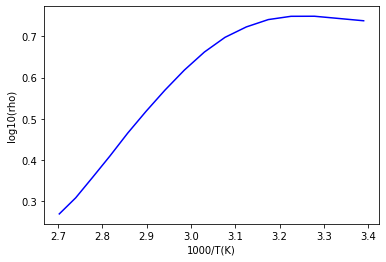

In [39]:
mp.plot(x,y, color = 'b')
mp.xlabel('1000/T(K)')
mp.ylabel('log10(rho)')
mp.show()

0.7393041911527146


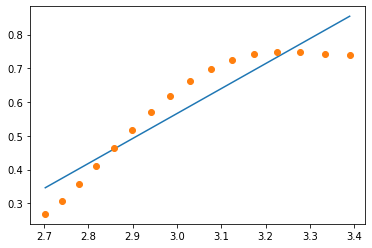

In [42]:

xi = np.array(x)
yi = np.array(y)
slope, intercept = np.polyfit(xi,yi,1)
m = slope
b = intercept
mp.plot(xi, m*xi + b)
mp.plot(xi, yi, 'o')
print(slope)

In [56]:
print((y[11]-y[10])/(x[11]-x[10]))
print(y[11], y[10], x[11], x[10])

1.2782863977508687
0.46507329000329156 0.5180044037817954 2.857142857142857 2.898550724637681


In [57]:
wrk_file.to_csv('observation_table.csv')

In [1]:
1.2782863977508687 * (8.62*2)*2.3026*((10)**3)*((10)**(-5)) #using the formula for calculation of band gap.

0.5074391015311023